# Input Parameters

In [1]:
import pint
import numpy as np

units = pint.UnitRegistry()

## Dimensions

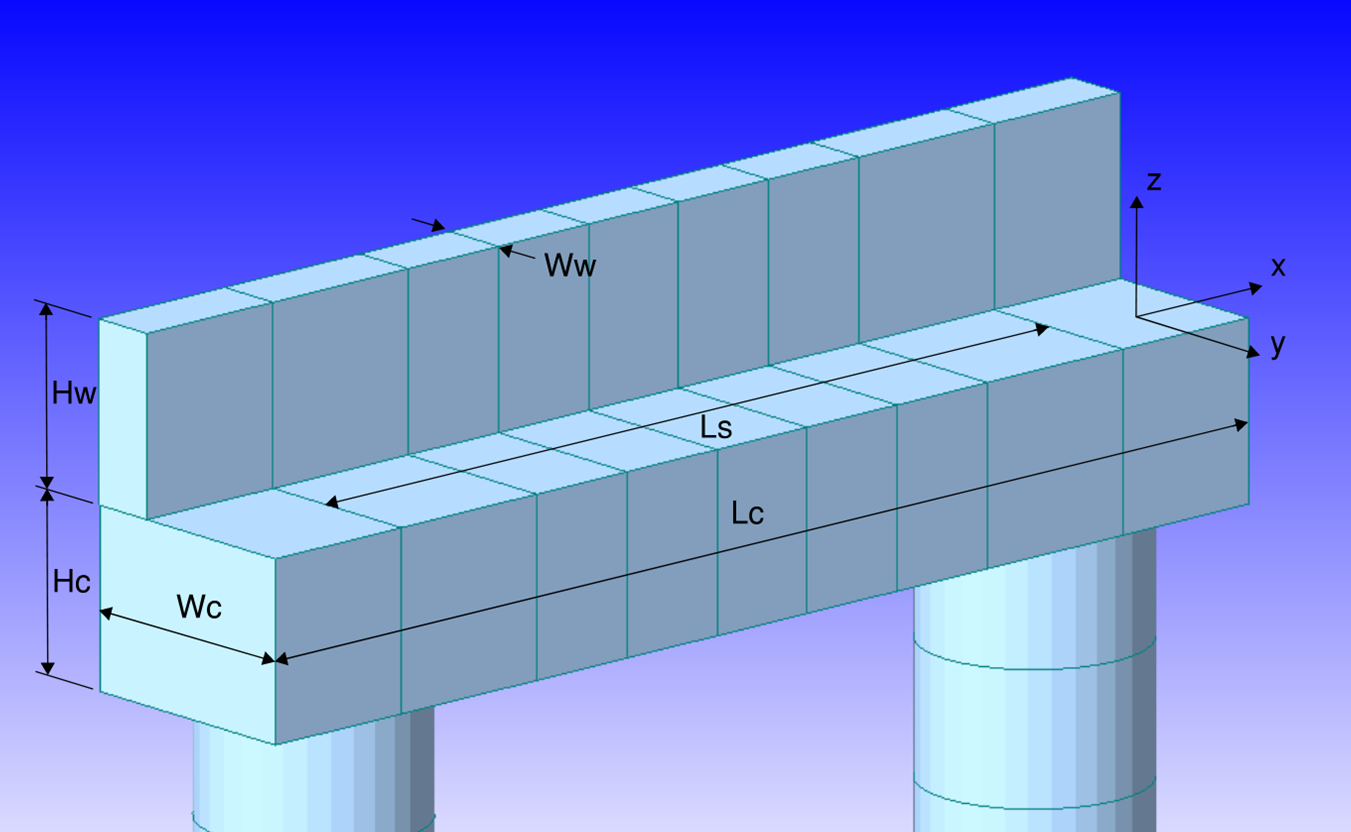

In [2]:
cap_length = L_c = 24 * units.ft
cap_width = W_c = 5.42 * units.ft
cap_height = H_c = 5 * units.ft
cap_span_length = L_s = 17 * units.ft
backwall_width = W_w = 1.5 * units.ft
backwall_height = H_w = 4.75 * units.ft
f_prime_c = f_c = 5 * units.ksi
f_y = 60 * units.ksi
top_cover = 2 * units.inch
side_cover = 2 * units.inch
bottom_cover = 2 * units.inch

# //TODO - Where do these come from?
# //TODO - Do we ever alter this? no of layers, spacing etc.
vert_rebar_row_spacing = (2.5 + 1.128) * units.inch
no_of_layer_1_bars = 9
size_of_layer_1_bars = 9
no_of_layer_2_bars = 16
size_of_layer_2_bars = 9
no_of_layer_3_bars = 0
size_of_layer_3_bars = 10

shear_stirrup_rebar_size = 6
shear_stirrup_no_legs = 2
shear_stirrup_spacing = 5.5 * units.inch

phi_f = 0.90  # AREMA 8-2.30.2-b
beta_1 = 0.80  # AREMA 8-2.31.1

Z = 170 * units("kips/in")  # Assume moderate environment, 8-2.39.b

gamma_e = 1 * units("kip/in")  # Assume Class 1 exposure condition

## Loads

In [3]:
dead_load_moment = M_DL = 597.79 * units("kip*ft")
live_load_plus_impact = M_LLI = 1682.88 * units("kip*ft")
wind_on_structure_moment = M_WS = 5.39 * units("kip*ft")
wind_on_train_moment = M_WL = 24.44 * units("kip*ft")
longitudinal_force_moment = M_LF = 70.25 * units("kip*ft")

$$ s \leq \frac{700 \gamma_e}{\beta_s f_{ss}} - 2 d_c $$

where:

$$ \beta_s = 1 + \frac{d_c}{0.7(h-d_c)} $$

$ \gamma_e $ = Exposure factor, 1.0 for class 1 exposure, 0.75 for class 2

$ \beta_s $ = ratio of flexural strain at extreme tension face to the strain at the centroid of the reinfocement layer nearest the tension face  
$ f_{ss} $ = calculated tensile stress in nonprestressed reinforcement at the service limit state. Shall not exceed 0.60 $f_y$ (ksi)  
$ d_c $ = thickness of concrete cover measured from the extreme tension fiber to center of the flexural reinforcement located closest thereto (in.)  
$ h $ = overall thickness or depth of the component (in.)

## Calculate Design Moment ($M_{uy}$)

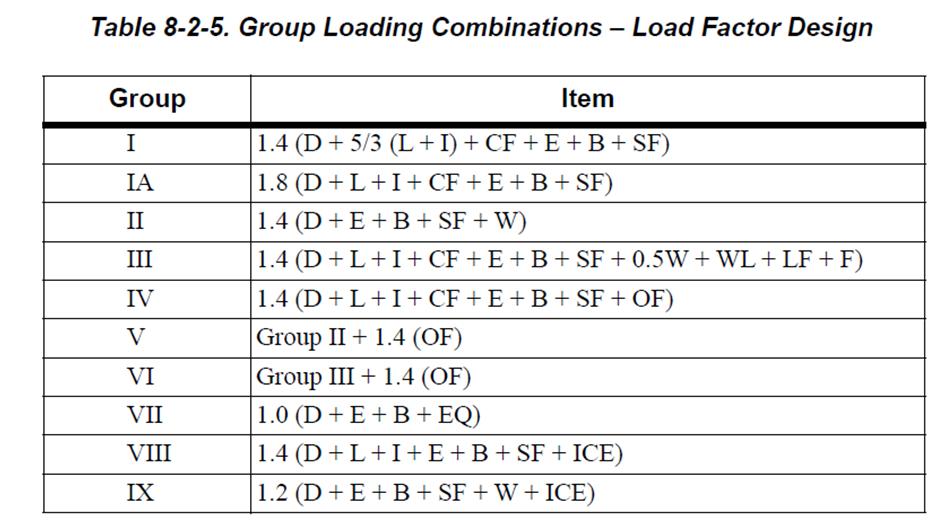

In [4]:
W_SW = (cap_height * cap_width + backwall_width * backwall_height) * (
    0.15 * (units.kips / units("ft^3"))
)
print(f"{W_SW=:}")

W_SW=5.13375 kip / foot


In [5]:
M_SW = W_SW * L_s**2 / 8
print(f"{M_SW=:}")

M_SW=185.45671875 foot * kip


Group I:

In [6]:
group_I_pos_M_Iy = 1.4 * (M_SW + M_DL + (5 / 3) * (M_LLI))
print(f"{group_I_pos_M_Iy=:}")

group_I_pos_M_Iy=5023.26540625 foot * kip


Group IA:

In [7]:
group_IA_pos_M_Iy = 1.8 * (M_SW + M_DL + M_LLI)
print(f"{group_IA_pos_M_Iy=:}")

group_IA_pos_M_Iy=4439.02809375 foot * kip


Group II:

In [8]:
group_II_pos_M_Iy = 1.4 * (M_SW + M_DL + M_WS + M_WL)
print(f"{group_II_pos_M_Iy=:}")

group_II_pos_M_Iy=1138.3074062499998 foot * kip


Group III:

In [9]:
group_III_pos_M_Iy = 1.4 * (M_SW + M_DL + M_LLI + 0.5 * M_WS + M_WL + M_LF)
print(f"{group_III_pos_M_Iy=:}")

group_III_pos_M_Iy=3588.91640625 foot * kip


In [10]:
M_uy = max(
    group_I_pos_M_Iy, group_IA_pos_M_Iy, group_II_pos_M_Iy, group_III_pos_M_Iy
).to("kip*in")

print(f"{M_uy=:}")

M_uy=60279.18487499999 inch * kip


## Cap Flexural Design

Establish rebar table

In [11]:
rebar = {
    3: {
        "AREA": 0.11 * units("in^2"),
        "WEIGHT": 0.376 * units("lb*ft"),
        "DIA": 0.375 * units.inch,
    },
    4: {
        "AREA": 0.2 * units("in^2"),
        "WEIGHT": 0.668 * units("lb*ft"),
        "DIA": 0.5 * units.inch,
    },
    5: {
        "AREA": 0.31 * units("in^2"),
        "WEIGHT": 1.043 * units("lb*ft"),
        "DIA": 0.625 * units.inch,
    },
    6: {
        "AREA": 0.44 * units("in^2"),
        "WEIGHT": 1.502 * units("lb*ft"),
        "DIA": 0.75 * units.inch,
    },
    7: {
        "AREA": 0.6 * units("in^2"),
        "WEIGHT": 2.044 * units("lb*ft"),
        "DIA": 0.875 * units.inch,
    },
    8: {
        "AREA": 0.79 * units("in^2"),
        "WEIGHT": 2.67 * units("lb*ft"),
        "DIA": 1 * units.inch,
    },
    9: {
        "AREA": 1 * units("in^2"),
        "WEIGHT": 3.4 * units("lb*ft"),
        "DIA": 1.128 * units.inch,
    },
    10: {
        "AREA": 1.27 * units("in^2"),
        "WEIGHT": 4.303 * units("lb*ft"),
        "DIA": 1.27 * units.inch,
    },
    11: {
        "AREA": 1.56 * units("in^2"),
        "WEIGHT": 5.313 * units("lb*ft"),
        "DIA": 1.41 * units.inch,
    },
    14: {
        "AREA": 2.25 * units("in^2"),
        "WEIGHT": 7.65 * units("lb*ft"),
        "DIA": 1.693 * units.inch,
    },
    18: {
        "AREA": 4 * units("in^2"),
        "WEIGHT": 13.6 * units("lb*ft"),
        "DIA": 2.257 * units.inch,
    },
}

In [12]:
A_s = sum(
    (
        no_of_layer_1_bars * rebar[size_of_layer_1_bars]["AREA"],
        no_of_layer_2_bars * rebar[size_of_layer_2_bars]["AREA"],
        no_of_layer_3_bars * rebar[size_of_layer_3_bars]["AREA"],
    )
)
print(f"{A_s=:}")

A_s=25.0 inch ** 2


In [13]:
# //TODO - Potential improvement, replace this with a list rather than fixed 3 layers
layer_1_y_bar = (
    bottom_cover
    + rebar[shear_stirrup_rebar_size]["DIA"]
    + rebar[size_of_layer_1_bars]["DIA"] / 2
)

if no_of_layer_2_bars != 0:
    layer_2_y_bar = layer_1_y_bar + vert_rebar_row_spacing
else:
    layer_2_y_bar = 0 * units.inch

if no_of_layer_3_bars != 0:
    layer_3_y_bar = layer_2_y_bar + vert_rebar_row_spacing
else:
    layer_3_y_bar = 0 * units.inch

y_bar = (  # Area of the rebar * number of rebars * distance from edge, each layer
    (rebar[size_of_layer_1_bars]["AREA"] * no_of_layer_1_bars * layer_1_y_bar)
    + (rebar[size_of_layer_2_bars]["AREA"] * no_of_layer_2_bars * layer_2_y_bar)
    + (rebar[size_of_layer_3_bars]["AREA"] * no_of_layer_3_bars * layer_3_y_bar)
) / (  # Divided by sum of Area of rebar * number of rebars for each layer
    rebar[size_of_layer_1_bars]["AREA"] * no_of_layer_1_bars
    + rebar[size_of_layer_2_bars]["AREA"] * no_of_layer_2_bars
    + rebar[size_of_layer_3_bars]["AREA"] * no_of_layer_3_bars
)

print(f"{y_bar=:}")

y_bar=5.63592 inch


In [14]:
d = (cap_height - y_bar).to("inch")
print(f"{d=:}")

d=54.36408 inch


In [15]:
rho_b = (
    (0.85 * beta_1 * f_c) / f_y * (87000 * units("psi") / (87000 * units("psi") + f_y))
)
print(f"{rho_b=:}")

rho_b=0.03353741496598639 dimensionless


In [16]:
b = cap_width.to("in")
rho = A_s / (b * d)
print(f"{rho=:}")

rho=0.0070704561502454915 dimensionless


In [17]:
a = A_s * f_y / (0.85 * f_c * b)
print(f"{a=:}")

a=5.42652485348383 inch


In [18]:
phi_M_ny = (phi_f * A_s * f_y * (d - a / 2)).to("kip*in")
print(f"{phi_M_ny=:}")

phi_M_ny=69728.60372389843 inch * kip


# 8-2.32.2 Rectangular Sections w/ Tension Reinforcement Only - Design Checks

In [19]:
if rho <= 0.75 * rho_b:
    print("OK")
else:
    print("FAIL")

OK


In [20]:
if phi_M_ny > M_uy:
    print("OK")
else:
    print("FAIL")

OK


# 8-2.7 Minimum Reinforcement of Flexural Members

At any section of a flexural member, the tension reinforcement shall be adeqaute to develop a design moment strength at least 1.2 times the cracking moment calculated on the basis of the modulus of rupture for normal weight concrete. These requirements may be waived if the area of reinforcement at the section is at least one third greater than that required by analysis. Since our rebar area is governed by the minimum longitudinal rebar area required in a compression member, show that the rebar provided is at least 1/3 greater than required.

In [21]:
A_s_23 = (2 / 3) * A_s
print(f"{A_s_23}")

16.666666666666664 inch ** 2


In [22]:
a_23 = (A_s_23 * f_y) / (0.85 * f_c * b)
print(f"{a_23}")

3.617683235655886 inch


In [23]:
phi_M_ny_23 = (phi_f * A_s_23 * f_y * (d - a_23 / 2)).to("inch*kip")
print(f"{phi_M_ny_23}")

47299.714543954855 inch * kip


In [24]:
# //TODO - This test is failing in the excel sheet - make sure that's correct
if phi_M_ny_23 > M_uy:
    print("OK")
else:
    print("NG")

NG


If needed, check the stress in concrete vs. the modulus of rupture specified in 8-2.26.1:


In [25]:
# 8-2.26.1a
# //TODO - Square root messes up these units, verify
f_r = 7.5 * (f_c.to("psi").magnitude ** 0.5) * units.psi
print(f"{f_r}")

530.3300858899107 pound_force_per_square_inch


In [26]:
I_g = ((1 / 12) * W_c * (H_c) ** 3).to("in^4")
print(f"{I_g}")

1170720.0000000002 inch ** 4


In [27]:
z = (H_c / 2).to("inch")
print(f"{z}")

30.0 inch


In [28]:
M_cry = (f_r * I_g / z).to("inch*kips")
print(f"{M_cry}")

20695.601271767886 inch * kip


In [29]:
if phi_M_ny >= 1.2 * M_cry:
    print("OK")
else:
    print("NG")

OK


# 8-2.39 - Distrbution of Flexural Reinforcement

In [30]:
M_y = (M_SW + M_DL + M_LLI).to("in*kip")
print(f"{M_y}")

29593.520624999997 inch * kip


In [31]:
n = round(29000 / (57 * np.sqrt(f_c.magnitude * 1000)), 2)
print(f"{n}")

7.2


In [32]:
k = np.sqrt(2 * rho * n + (rho * n) ** 2) - (rho * n)
print(f"{k}")

0.2722120747119018 dimensionless


In [33]:
j = 1 - k / 3
print(f"{j}")

0.9092626417626994 dimensionless


In [34]:
f_s = (M_y / (A_s * j * d)).to("ksi")
print(f"{f_s}")

23.94722722648002 kip_per_square_inch


In [35]:
A = (
    W_c
    * (y_bar * 2)
    / sum((no_of_layer_1_bars, no_of_layer_2_bars, no_of_layer_3_bars))
).to("inch^2")
print(f"{A}")

29.324818944 inch ** 2


In [36]:
d_c = min(2 * units("in") + 0.5 * rebar[size_of_layer_1_bars]["DIA"], H_c - d)
print(f"{d_c}")

2.564 inch


In [37]:
f_s_max = min(0.5 * f_y, Z / (d_c * A) ** (1 / 3))
print(f"{f_s_max}")

30.0 kip_per_square_inch


In [38]:
if f_s <= f_s_max:
    print("OK")
else:
    print("NG")

OK


# New 8-2.39 Process

In [39]:
beta_S = 1 + (layer_1_y_bar / (0.7 * (H_c - layer_1_y_bar)))
print(f"{beta_S}")

1.0835177242050191 dimensionless


In [40]:
f_ss = min(f_s, 0.6 * f_y)
print(f"{f_ss}")

23.94722722648002 kip_per_square_inch


In [41]:
s = (((700 * gamma_e) / (beta_S * f_ss)) - (2 * layer_1_y_bar)).to("in")
print(f"{s}")

20.34981579801293 inch


In [42]:
layer_1_bars_clr_spacing = (
    W_c
    - 2 * side_cover
    - 2 * rebar[shear_stirrup_rebar_size]["DIA"]
    - rebar[size_of_layer_1_bars]["DIA"]
) / (no_of_layer_1_bars - 1)
print(f"{layer_1_bars_clr_spacing}")

0.6084583333333333 foot


In [43]:
layer_1_bars_clr_spacing = (
    W_c
    - 2 * side_cover
    - 2 * rebar[shear_stirrup_rebar_size]["DIA"]
    - rebar[size_of_layer_1_bars]["DIA"]
) / (no_of_layer_1_bars - 1)

# // TODO - Verify design spacing only applies to extreme layer (1)
if rebar[size_of_layer_1_bars]["DIA"] + layer_1_bars_clr_spacing < s:
    print("OK")
else:
    print("NG")

OK


# Creating a Class to Perform Both Checks

In [44]:
class AremaBackwall:
    def __init__(
        self,
        L_c=24 * units.ft,  # Cap Length
        W_c=5.42 * units.ft,  # Cap Width
        H_c=5 * units.ft,  # Cap Height
        L_s=17 * units.ft,  # Length of Span
        W_w=1.5 * units.ft,  # Backwall Width
        H_w=4.75 * units.ft,  # Backwall Height
        f_c=5 * units.ksi,  # f'_c Concrete
        f_y=60 * units.ksi,  # f_y steel
        moment_loads={  # //TODO - These are just being plugged in, update them to be calculated
            "DL": 597.79 * units("kip*ft"),
            "LL+I": 1682.88 * units("kip*ft"),
            "WS": 5.39 * units("kip*ft"),
            "WL": 24.44 * units("kip*ft"),
            "LF": 70.25 * units("kip*ft"),
        },
        bar_size_1=9,
        no_of_bars_1=9,
        bar_size_2=9,
        no_of_bars_2=16,
        bar_size_3=10,
        no_of_bars_3=0,
    ):
        self.general_tests = []
        self.old_tests = []
        self.new_tests = []
        self.L_c = L_c
        self.W_c = W_c
        self.H_c = H_c
        self.L_s = L_s
        self.W_w = W_w
        self.H_w = H_w
        self.f_c = f_c
        self.f_y = f_y
        self.top_cover = 2 * units.inch
        self.side_cover = 2 * units.inch
        self.bottom_cover = 2 * units.inch

        self.vert_rebar_row_spacing = (2.5 + 1.128) * units.inch
        self.no_of_layer_1_bars = no_of_bars_1
        self.size_of_layer_1_bars = bar_size_1
        self.no_of_layer_2_bars = no_of_bars_2
        self.size_of_layer_2_bars = bar_size_2
        self.no_of_layer_3_bars = no_of_bars_3
        self.size_of_layer_3_bars = bar_size_3

        self.shear_stirrup_rebar_size = 6
        self.shear_stirrup_no_legs = 2
        self.shear_stirrup_spacing = 5.5 * units.inch
        self.phi_f = 0.90  # AREMA 8-2.30.2-b
        self.beta_1 = 0.80  # AREMA 8-2.31.1
        self.Z = 170 * units("kips/in")  # Assume moderate environment, 8-2.39.b

        self.gamma_e = 1 * units("kip/in")  # Assume Class 1 exposure condition
        self.properties = None

        self.moment_loads = moment_loads

        self.calc_backwall_properties()
        self.run_general_tests()
        self.run_old_tests()
        self.run_new_tests()

    def calc_backwall_properties(self):
        self.properties = True
        self.W_SW = (self.H_c * self.W_c + self.W_w * self.H_w) * (
            0.15 * (units.kips / units("ft^3"))
        )
        self.M_SW = self.W_SW * self.L_s**2 / 8
        self.group_I_pos_M_Iy = 1.4 * (
            self.M_SW + self.moment_loads["DL"] + (5 / 3) * (self.moment_loads["LL+I"])
        )
        self.group_IA_pos_M_Iy = 1.8 * (
            self.M_SW + self.moment_loads["DL"] + self.moment_loads["LL+I"]
        )
        self.group_II_pos_M_Iy = 1.4 * (
            self.M_SW
            + self.moment_loads["DL"]
            + self.moment_loads["WS"]
            + self.moment_loads["WL"]
        )
        self.group_III_pos_M_Iy = 1.4 * (
            self.M_SW
            + self.moment_loads["DL"]
            + self.moment_loads["LL+I"]
            + 0.5 * self.moment_loads["WS"]
            + self.moment_loads["WL"]
            + self.moment_loads["LF"]
        )
        self.M_uy = max(
            self.group_I_pos_M_Iy,
            self.group_IA_pos_M_Iy,
            self.group_II_pos_M_Iy,
            self.group_III_pos_M_Iy,
        ).to("kip*in")
        self.A_s = sum(
            (
                self.no_of_layer_1_bars * rebar[self.size_of_layer_1_bars]["AREA"],
                self.no_of_layer_2_bars * rebar[self.size_of_layer_2_bars]["AREA"],
                self.no_of_layer_3_bars * rebar[self.size_of_layer_3_bars]["AREA"],
            )
        )
        self.layer_1_y_bar = (
            self.bottom_cover
            + rebar[self.shear_stirrup_rebar_size]["DIA"]
            + rebar[self.size_of_layer_1_bars]["DIA"] / 2
        )
        if self.no_of_layer_2_bars != 0:
            self.layer_2_y_bar = self.layer_1_y_bar + self.vert_rebar_row_spacing
        else:
            self.layer_2_y_bar = 0 * units.inch
        if self.no_of_layer_3_bars != 0:
            self.layer_3_y_bar = self.layer_2_y_bar + self.vert_rebar_row_spacing
        else:
            self.layer_3_y_bar = 0 * units.inch

        self.y_bar = (
            (  # Area of the rebar * number of rebars * distance from edge, each layer
                (
                    rebar[self.size_of_layer_1_bars]["AREA"]
                    * self.no_of_layer_1_bars
                    * self.layer_1_y_bar
                )
                + (
                    rebar[self.size_of_layer_2_bars]["AREA"]
                    * self.no_of_layer_2_bars
                    * self.layer_2_y_bar
                )
                + (
                    rebar[self.size_of_layer_3_bars]["AREA"]
                    * self.no_of_layer_3_bars
                    * self.layer_3_y_bar
                )
            )
            / (  # Divided by sum of Area of rebar * number of rebars for each layer
                rebar[self.size_of_layer_1_bars]["AREA"] * self.no_of_layer_1_bars
                + rebar[self.size_of_layer_2_bars]["AREA"] * self.no_of_layer_2_bars
                + rebar[self.size_of_layer_3_bars]["AREA"] * self.no_of_layer_3_bars
            )
        )
        self.d = (self.H_c - self.y_bar).to("inch")
        self.rho_b = (
            (0.85 * self.beta_1 * self.f_c)
            / self.f_y
            * (87000 * units("psi") / (87000 * units("psi") + self.f_y))
        )
        self.b = self.W_c.to("in")

        self.rho = self.A_s / (self.b * self.d)
        self.a = self.A_s * self.f_y / (0.85 * self.f_c * self.b)
        self.phi_M_ny = (self.phi_f * self.A_s * self.f_y * (self.d - self.a / 2)).to(
            "kip*in"
        )
        self.A_s_23 = (2 / 3) * self.A_s
        self.a_23 = (self.A_s_23 * self.f_y) / (0.85 * self.f_c * self.b)
        self.phi_M_ny_23 = (
            self.phi_f * self.A_s_23 * self.f_y * (self.d - self.a_23 / 2)
        ).to("inch*kip")
        self.f_r = 7.5 * (self.f_c.to("psi").magnitude ** 0.5) * units.psi
        self.I_g = ((1 / 12) * self.W_c * (self.H_c) ** 3).to("in^4")
        self.z = (self.H_c / 2).to("inch")
        self.M_cry = (self.f_r * self.I_g / self.z).to("inch*kips")
        self.M_y = (self.M_SW + self.moment_loads["DL"] + self.moment_loads["LL+I"]).to(
            "in*kip"
        )

        self.n = round(29000 / (57 * np.sqrt(self.f_c.magnitude * 1000)), 2)

        self.k = np.sqrt(2 * self.rho * self.n + (self.rho * self.n) ** 2) - (
            self.rho * self.n
        )
        self.j = 1 - self.k / 3
        self.f_s = (self.M_y / (self.A_s * self.j * self.d)).to("ksi")

        self.A = (
            self.W_c
            * (self.y_bar * 2)
            / sum(
                (
                    self.no_of_layer_1_bars,
                    self.no_of_layer_2_bars,
                    self.no_of_layer_3_bars,
                )
            )
        ).to("inch^2")
        self.d_c = min(
            2 * units("in") + 0.5 * rebar[size_of_layer_1_bars]["DIA"],
            self.H_c - self.d,
        )
        self.f_s_max = min(0.5 * self.f_y, self.Z / (self.d_c * self.A) ** (1 / 3))
        self.beta_S = 1 + (self.layer_1_y_bar / (0.7 * (self.H_c - self.layer_1_y_bar)))
        self.f_ss = min(self.f_s, 0.6 * self.f_y)
        self.s = (
            ((700 * self.gamma_e) / (self.beta_S * self.f_ss))
            - (2 * self.layer_1_y_bar)
        ).to("in")
        self.layer_1_bars_clr_spacing = (
            self.W_c
            - 2 * self.side_cover
            - 2 * rebar[self.shear_stirrup_rebar_size]["DIA"]
            - rebar[self.size_of_layer_1_bars]["DIA"]
        ) / (self.no_of_layer_1_bars - 1)

    def run_general_tests(self):
        if self.rho <= 0.75 * self.rho_b:
            self.general_tests.append(1)
        else:
            self.general_tests.append(0)

        if phi_M_ny > M_uy:
            self.general_tests.append(1)
        else:
            self.general_tests.append(0)

        if phi_M_ny_23 > M_uy:
            self.general_tests.append(1)
        elif phi_M_ny >= 1.2 * M_cry:
            self.general_tests.append(1)
        else:
            self.general_tests.append(0)

    def run_old_tests(self):
        if self.f_s <= self.f_s_max:
            self.old_tests.append(1)
        else:
            self.old_tests.append(0)

    def run_new_tests(self):
        if (
            rebar[self.size_of_layer_1_bars]["DIA"] + self.layer_1_bars_clr_spacing
            < self.s
        ):
            self.new_tests.append(1)
        else:
            self.new_tests.append(0)

# Looping Through Various Checks While only Altering a Single Variable

In [45]:
varying = "Cap Length"

for value in range(10, 100, 5):
    temp_backwall = AremaBackwall(L_c=value * units.ft)

    if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
        for bar_size in range(0, 7, 1):
            temp_backwall = AremaBackwall(L_c=value * units.ft, bar_size_1=9 - bar_size)

            if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
                # Uncomment to see that both methods pass for rebar sizes > #5
                # print(f"Both Methods pass for {varying} {value=:} rebar size={temp_backwall.size_of_layer_1_bars}")
                pass
            else:
                print(
                    f"{varying} {value=:}, rebar size={9-bar_size} old test: {temp_backwall.old_tests} new test: {temp_backwall.new_tests}"
                )
    elif not all(temp_backwall.old_tests) and not all(temp_backwall.new_tests):
        print("Both Failed")
    elif not all(temp_backwall.old_tests):
        print(
            f"Old Test Failed {temp_backwall.old_tests} for {varying} of {temp_backwall.L_c}"
        )
    elif not all(temp_backwall.new_tests):
        print(
            f"New Test Failed {temp_backwall.new_tests} for {varying} of {temp_backwall.L_c}"
        )
    else:
        print("Error")

Cap Length value=10, rebar size=5 old test: [0] new test: [1]
Cap Length value=10, rebar size=4 old test: [0] new test: [1]
Cap Length value=10, rebar size=3 old test: [0] new test: [1]
Cap Length value=15, rebar size=5 old test: [0] new test: [1]
Cap Length value=15, rebar size=4 old test: [0] new test: [1]
Cap Length value=15, rebar size=3 old test: [0] new test: [1]
Cap Length value=20, rebar size=5 old test: [0] new test: [1]
Cap Length value=20, rebar size=4 old test: [0] new test: [1]
Cap Length value=20, rebar size=3 old test: [0] new test: [1]
Cap Length value=25, rebar size=5 old test: [0] new test: [1]
Cap Length value=25, rebar size=4 old test: [0] new test: [1]
Cap Length value=25, rebar size=3 old test: [0] new test: [1]
Cap Length value=30, rebar size=5 old test: [0] new test: [1]
Cap Length value=30, rebar size=4 old test: [0] new test: [1]
Cap Length value=30, rebar size=3 old test: [0] new test: [1]
Cap Length value=35, rebar size=5 old test: [0] new test: [1]
Cap Leng

In [55]:
varying = "Cap Width"

for value in range(4, 13, 1):
    temp_backwall = AremaBackwall(W_c=value * units.ft)

    if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
        for bar_size in range(-2, 7, 1):
            temp_backwall = AremaBackwall(L_c=value * units.ft, bar_size_1=9 - bar_size)

            if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
                # Uncomment to see that both methods pass for rebar sizes > #5
                # print(f"Both Methods pass for {varying} {value=:} rebar size={temp_backwall.size_of_layer_1_bars}")
                pass
            else:
                print(
                    f"{varying} {value=:}, rebar size={temp_backwall.size_of_layer_1_bars} old test: {temp_backwall.old_tests} new test: {temp_backwall.new_tests}"
                )
    elif not all(temp_backwall.old_tests) and not all(temp_backwall.new_tests):
        print("Both Failed")
    elif not all(temp_backwall.old_tests):
        print(
            f"Old Tests Failed {temp_backwall.old_tests} for {varying} of {temp_backwall.W_c}"
        )
    elif not all(temp_backwall.new_tests):
        print(
            f"New Tests Failed {temp_backwall.new_tests} for {varying} of {temp_backwall.W_c}"
        )
    else:
        print("Error")

Cap Width value=4, rebar size=5 old test: [0] new test: [1]
Cap Width value=4, rebar size=4 old test: [0] new test: [1]
Cap Width value=4, rebar size=3 old test: [0] new test: [1]
Cap Width value=5, rebar size=5 old test: [0] new test: [1]
Cap Width value=5, rebar size=4 old test: [0] new test: [1]
Cap Width value=5, rebar size=3 old test: [0] new test: [1]
Cap Width value=6, rebar size=5 old test: [0] new test: [1]
Cap Width value=6, rebar size=4 old test: [0] new test: [1]
Cap Width value=6, rebar size=3 old test: [0] new test: [1]
Cap Width value=7, rebar size=5 old test: [0] new test: [1]
Cap Width value=7, rebar size=4 old test: [0] new test: [1]
Cap Width value=7, rebar size=3 old test: [0] new test: [1]
Cap Width value=8, rebar size=5 old test: [0] new test: [1]
Cap Width value=8, rebar size=4 old test: [0] new test: [1]
Cap Width value=8, rebar size=3 old test: [0] new test: [1]
Cap Width value=9, rebar size=5 old test: [0] new test: [1]
Cap Width value=9, rebar size=4 old test

In [47]:
varying = "Cap Height"

for value in range(1, 11, 1):
    temp_backwall = AremaBackwall(H_c=value * units.ft)

    if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
        for bar_size in range(0, 7, 1):
            temp_backwall = AremaBackwall(L_c=value * units.ft, bar_size_1=9 - bar_size)

            if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
                # Uncomment to see that both methods pass for rebar sizes > #5
                # print(f"Both Methods pass for {varying} {value=:} rebar size={temp_backwall.size_of_layer_1_bars}")
                pass
            else:
                print(
                    f"{varying} {value=:}, rebar size={temp_backwall.size_of_layer_1_bars} old test: {temp_backwall.old_tests} new test: {temp_backwall.new_tests}"
                )
    elif not all(temp_backwall.old_tests) and not all(temp_backwall.new_tests):
        print("Both Failed")
    elif not all(temp_backwall.old_tests):
        print(
            f"Old Tests Failed {temp_backwall.old_tests} for {varying} of {temp_backwall.H_c}"
        )
    elif not all(temp_backwall.new_tests):
        print(
            f"New Tests Failed {temp_backwall.new_tests} for {varying} of {temp_backwall.H_c} rebar_size {temp_backwall.size_of_layer_1_bars}"
        )
    else:
        print("Error")

Both Failed
Old Tests Failed [0] for Cap Height of 2 foot
Old Tests Failed [0] for Cap Height of 3 foot
Old Tests Failed [0] for Cap Height of 4 foot
Cap Height value=5, rebar size=5 old test: [0] new test: [1]
Cap Height value=5, rebar size=4 old test: [0] new test: [1]
Cap Height value=5, rebar size=3 old test: [0] new test: [1]
Cap Height value=6, rebar size=5 old test: [0] new test: [1]
Cap Height value=6, rebar size=4 old test: [0] new test: [1]
Cap Height value=6, rebar size=3 old test: [0] new test: [1]
Cap Height value=7, rebar size=5 old test: [0] new test: [1]
Cap Height value=7, rebar size=4 old test: [0] new test: [1]
Cap Height value=7, rebar size=3 old test: [0] new test: [1]
Cap Height value=8, rebar size=5 old test: [0] new test: [1]
Cap Height value=8, rebar size=4 old test: [0] new test: [1]
Cap Height value=8, rebar size=3 old test: [0] new test: [1]
Cap Height value=9, rebar size=5 old test: [0] new test: [1]
Cap Height value=9, rebar size=4 old test: [0] new test: 

In [48]:
"""
Brings up an interesting issue, since the loads (Moments) are manually entered
in the spreadsheet, the length of the span isn't being affected by this. In 
reality, the moments and loads would normally be affected by the L_s value
"""

varying = "Span Length"

for value in range(10, 100, 10):
    temp_backwall = AremaBackwall(L_s=value * units.ft)

    if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
        for bar_size in range(0, 7, 1):
            temp_backwall = AremaBackwall(L_c=value * units.ft, bar_size_1=9 - bar_size)

            if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
                # Uncomment to see that both methods pass for rebar sizes > #5
                # print(f"Both Methods pass for {varying} {value=:} rebar size={temp_backwall.size_of_layer_1_bars}")
                pass
            else:
                print(
                    f"{varying} {value=:}, rebar size={temp_backwall.size_of_layer_1_bars} old test: {temp_backwall.old_tests} new test: {temp_backwall.new_tests}"
                )
    elif not all(temp_backwall.old_tests) and not all(temp_backwall.new_tests):
        print("Both Failed")
    elif not all(temp_backwall.old_tests):
        print(
            f"Old Tests Failed {temp_backwall.old_tests} for {varying} of {temp_backwall.L_s}"
        )
    elif not all(temp_backwall.new_tests):
        print(
            f"New Tests Failed {temp_backwall.new_tests} for {varying} of {temp_backwall.L_s}"
        )
    else:
        print("Error")

Span Length value=10, rebar size=5 old test: [0] new test: [1]
Span Length value=10, rebar size=4 old test: [0] new test: [1]
Span Length value=10, rebar size=3 old test: [0] new test: [1]
Span Length value=20, rebar size=5 old test: [0] new test: [1]
Span Length value=20, rebar size=4 old test: [0] new test: [1]
Span Length value=20, rebar size=3 old test: [0] new test: [1]
Span Length value=30, rebar size=5 old test: [0] new test: [1]
Span Length value=30, rebar size=4 old test: [0] new test: [1]
Span Length value=30, rebar size=3 old test: [0] new test: [1]
Old Tests Failed [0] for Span Length of 40 foot
Old Tests Failed [0] for Span Length of 50 foot
Old Tests Failed [0] for Span Length of 60 foot
Old Tests Failed [0] for Span Length of 70 foot
Old Tests Failed [0] for Span Length of 80 foot
Old Tests Failed [0] for Span Length of 90 foot


In [49]:
varying = "Backwall Width"

for value in range(20, 120, 10):
    temp_backwall = AremaBackwall(W_w=(value / 10) * units.ft)

    if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
        for bar_size in range(0, 7, 1):
            temp_backwall = AremaBackwall(L_c=value * units.ft, bar_size_1=9 - bar_size)

            if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
                # Uncomment to see that both methods pass for rebar sizes > #5
                # print(f"Both Methods pass for {varying} {value=:} rebar size={temp_backwall.size_of_layer_1_bars}")
                pass
            else:
                print(
                    f"{varying} {value=:}, rebar size={temp_backwall.size_of_layer_1_bars} old test: {temp_backwall.old_tests} new test: {temp_backwall.new_tests}"
                )
    elif not all(temp_backwall.old_tests) and not all(temp_backwall.new_tests):
        print("Both Failed")
    elif not all(temp_backwall.old_tests):
        print(
            f"Old Tests Failed {temp_backwall.old_tests} for {varying} of {temp_backwall.W_w}"
        )
    elif not all(temp_backwall.new_tests):
        print(
            f"New Tests Failed {temp_backwall.new_tests} for {varying} of {temp_backwall.W_w}"
        )
    else:
        print("Error")

Backwall Width value=20, rebar size=5 old test: [0] new test: [1]
Backwall Width value=20, rebar size=4 old test: [0] new test: [1]
Backwall Width value=20, rebar size=3 old test: [0] new test: [1]
Backwall Width value=30, rebar size=5 old test: [0] new test: [1]
Backwall Width value=30, rebar size=4 old test: [0] new test: [1]
Backwall Width value=30, rebar size=3 old test: [0] new test: [1]
Backwall Width value=40, rebar size=5 old test: [0] new test: [1]
Backwall Width value=40, rebar size=4 old test: [0] new test: [1]
Backwall Width value=40, rebar size=3 old test: [0] new test: [1]
Backwall Width value=50, rebar size=5 old test: [0] new test: [1]
Backwall Width value=50, rebar size=4 old test: [0] new test: [1]
Backwall Width value=50, rebar size=3 old test: [0] new test: [1]
Backwall Width value=60, rebar size=5 old test: [0] new test: [1]
Backwall Width value=60, rebar size=4 old test: [0] new test: [1]
Backwall Width value=60, rebar size=3 old test: [0] new test: [1]
Backwall W

In [50]:
varying = "Backwall Height"

for value in range(0, 90, 10):
    temp_backwall = AremaBackwall(H_w=value * units.ft)

    if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
        for bar_size in range(0, 7, 1):
            temp_backwall = AremaBackwall(L_c=value * units.ft, bar_size_1=9 - bar_size)

            if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
                # Uncomment to see that both methods pass for rebar sizes > #5
                # print(f"Both Methods pass for {varying} {value=:} rebar size={temp_backwall.size_of_layer_1_bars}")
                pass
            else:
                print(
                    f"{varying} {value=:}, rebar size={temp_backwall.size_of_layer_1_bars} old test: {temp_backwall.old_tests} new test: {temp_backwall.new_tests}"
                )
    elif not all(temp_backwall.old_tests) and not all(temp_backwall.new_tests):
        print("Both Failed")
    elif not all(temp_backwall.old_tests):
        print(
            f"Old Tests Failed {temp_backwall.old_tests} for {varying} of {temp_backwall.H_w}"
        )
    elif not all(temp_backwall.new_tests):
        print(
            f"New Tests Failed {temp_backwall.new_tests} for {varying} of {temp_backwall.H_w}"
        )
    else:
        print("Error")

Backwall Height value=0, rebar size=5 old test: [0] new test: [1]
Backwall Height value=0, rebar size=4 old test: [0] new test: [1]
Backwall Height value=0, rebar size=3 old test: [0] new test: [1]
Backwall Height value=10, rebar size=5 old test: [0] new test: [1]
Backwall Height value=10, rebar size=4 old test: [0] new test: [1]
Backwall Height value=10, rebar size=3 old test: [0] new test: [1]
Backwall Height value=20, rebar size=5 old test: [0] new test: [1]
Backwall Height value=20, rebar size=4 old test: [0] new test: [1]
Backwall Height value=20, rebar size=3 old test: [0] new test: [1]
Backwall Height value=30, rebar size=5 old test: [0] new test: [1]
Backwall Height value=30, rebar size=4 old test: [0] new test: [1]
Backwall Height value=30, rebar size=3 old test: [0] new test: [1]
Backwall Height value=40, rebar size=5 old test: [0] new test: [1]
Backwall Height value=40, rebar size=4 old test: [0] new test: [1]
Backwall Height value=40, rebar size=3 old test: [0] new test: [1

In [51]:
varying = "Number of Layer 1 Bars"

for value in range(2, 20, 2):
    temp_backwall = AremaBackwall(no_of_bars_1=value)

    if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
        for bar_size in range(0, 7, 1):
            temp_backwall = AremaBackwall(L_c=value * units.ft, bar_size_1=9 - bar_size)

            if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
                # Uncomment to see that both methods pass for rebar sizes > #5
                # print(f"Both Methods pass for {varying} {value=:} rebar size={temp_backwall.size_of_layer_1_bars}")
                pass
            else:
                print(
                    f"{varying} {value=:}, rebar size={temp_backwall.size_of_layer_1_bars} old test: {temp_backwall.old_tests} new test: {temp_backwall.new_tests}"
                )
    elif not all(temp_backwall.old_tests) and not all(temp_backwall.new_tests):
        print("Both Failed")
    elif not all(temp_backwall.old_tests):
        print(
            f"Old Tests Failed {temp_backwall.old_tests} for {varying}={temp_backwall.no_of_layer_1_bars}"
        )
    elif not all(temp_backwall.new_tests):
        print(
            f"New Tests Failed {temp_backwall.new_tests} for {varying}={temp_backwall.no_of_layer_1_bars}"
        )
    else:
        print("Error")

Both Failed
New Tests Failed [0] for Number of Layer 1 Bars=4
Number of Layer 1 Bars value=6, rebar size=5 old test: [0] new test: [1]
Number of Layer 1 Bars value=6, rebar size=4 old test: [0] new test: [1]
Number of Layer 1 Bars value=6, rebar size=3 old test: [0] new test: [1]
Number of Layer 1 Bars value=8, rebar size=5 old test: [0] new test: [1]
Number of Layer 1 Bars value=8, rebar size=4 old test: [0] new test: [1]
Number of Layer 1 Bars value=8, rebar size=3 old test: [0] new test: [1]
Number of Layer 1 Bars value=10, rebar size=5 old test: [0] new test: [1]
Number of Layer 1 Bars value=10, rebar size=4 old test: [0] new test: [1]
Number of Layer 1 Bars value=10, rebar size=3 old test: [0] new test: [1]
Number of Layer 1 Bars value=12, rebar size=5 old test: [0] new test: [1]
Number of Layer 1 Bars value=12, rebar size=4 old test: [0] new test: [1]
Number of Layer 1 Bars value=12, rebar size=3 old test: [0] new test: [1]
Number of Layer 1 Bars value=14, rebar size=5 old test: 

In [52]:
varying = "Number of Layer 2 Bars"

for value in range(2, 20, 2):
    temp_backwall = AremaBackwall(no_of_bars_2=value)

    if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
        for bar_size in range(0, 7, 1):
            temp_backwall = AremaBackwall(L_c=value * units.ft, bar_size_1=9 - bar_size)

            if all(temp_backwall.old_tests) and all(temp_backwall.new_tests):
                # Uncomment to see that both methods pass for rebar sizes > #5
                # print(f"Both Methods pass for {varying} {value=:} rebar size={temp_backwall.size_of_layer_1_bars}")
                pass
            else:
                print(
                    f"{varying} {value=:}, rebar size={temp_backwall.size_of_layer_1_bars} old test: {temp_backwall.old_tests} new test: {temp_backwall.new_tests}"
                )
    elif not all(temp_backwall.old_tests) and not all(temp_backwall.new_tests):
        print("Both Failed")
    elif not all(temp_backwall.old_tests):
        print(
            f"Old Tests Failed {temp_backwall.old_tests} for {varying}={temp_backwall.no_of_layer_2_bars}"
        )
    elif not all(temp_backwall.new_tests):
        print(
            f"New Tests Failed {temp_backwall.new_tests} for {varying}={temp_backwall.no_of_layer_2_bars}"
        )
    else:
        print("Error")

Old Tests Failed [0] for Number of Layer 2 Bars=2
Old Tests Failed [0] for Number of Layer 2 Bars=4
Old Tests Failed [0] for Number of Layer 2 Bars=6
Old Tests Failed [0] for Number of Layer 2 Bars=8
Old Tests Failed [0] for Number of Layer 2 Bars=10
Number of Layer 2 Bars value=12, rebar size=5 old test: [0] new test: [1]
Number of Layer 2 Bars value=12, rebar size=4 old test: [0] new test: [1]
Number of Layer 2 Bars value=12, rebar size=3 old test: [0] new test: [1]
Number of Layer 2 Bars value=14, rebar size=5 old test: [0] new test: [1]
Number of Layer 2 Bars value=14, rebar size=4 old test: [0] new test: [1]
Number of Layer 2 Bars value=14, rebar size=3 old test: [0] new test: [1]
Number of Layer 2 Bars value=16, rebar size=5 old test: [0] new test: [1]
Number of Layer 2 Bars value=16, rebar size=4 old test: [0] new test: [1]
Number of Layer 2 Bars value=16, rebar size=3 old test: [0] new test: [1]
Number of Layer 2 Bars value=18, rebar size=5 old test: [0] new test: [1]
Number of

# Appendix

In [53]:
loads = {
    "D": None,
    "L": None,
    "I": None,
    "CF": None,
    "E": None,
    "B": None,
    "SF": None,
    "W": None,
    "WL": None,
    "LF": None,
    "F": None,
    "OF": None,
    "EQ": None,
    "ICE": None,
}

## Test Flow

### New Test

```python
rebar[self.size_of_layer_1_bars]['DIA'] + self.layer_1_bars_clr_spacing < self.s 
```
Takes the diameter of the layer 1 rebar and adds it to the `layer_1_bars_clr_spacing` makes sure the result is less than `s` which is defined by:

$$ s \leq \frac{700 \gamma_e}{\beta_s f_{ss}} - 2 d_c $$

where:

$$ \beta_s = 1 + \frac{d_c}{0.7(h-d_c)} $$

$ \gamma_e $ = Exposure factor, 1.0 for class 1 exposure, 0.75 for class 2

$ \beta_s $ = ratio of flexural strain at extreme tension face to the strain at the centroid of the reinfocement layer nearest the tension face  
$ f_{ss} $ = calculated tensile stress in nonprestressed reinforcement at the service limit state. Shall not exceed 0.60 $f_y$ (ksi)  
$ d_c $ = thickness of concrete cover measured from the extreme tension fiber to center of the flexural reinforcement located closest thereto (in.)  
$ h $ = overall thickness or depth of the component (in.)

Which is defined by the python code:

```python
self.s = (((700*self.gamma_e)/(self.beta_S*self.f_ss))-(2*self.layer_1_y_bar)).to('in')
```

`self.layer_1_y_bar` is defined by:

```python
self.layer_1_y_bar = (
    self.bottom_cover + 
    rebar[self.shear_stirrup_rebar_size]['DIA'] + 
    rebar[self.size_of_layer_1_bars]['DIA']/2
)
```

or the bottom cover + dia of the shear stirrup + half the diameter of the layer 1 bars

`self.f_ss` is defined by:

```python
self.f_ss = min(self.f_s,0.6*self.f_y)
```

or the minimum value of `0.6 * f_y` (yield strength of the rebar) and,

```python
self.f_s = (self.M_y/(self.A_s*self.j*self.d)).to('ksi')
```

Which is dependent on the `self.M_y`, `self.j`, `self.d` or the following factored load;

```python
self.M_y = (self.M_SW+self.moment_loads['DL']+self.moment_loads['LL+I']).to('in*kip')
```

`self.M_SW` is defined by;  
Note: (the other two moments are manually entered in excel, so calced using other software)

```python
self.W_SW = (self.H_c * self.W_c + self.W_w*self.H_w)*(0.15*(units.kips/units('ft^3')))
self.M_SW = self.W_SW * self.L_s ** 2 / 8
```

Where;

`self.H_c` = Height of the cap  
`self.W_c` = Width of the cap  
`self.W_w` = Width of the Backwall  
`self.H_w` = Height of the backwall  
`self.L_s` = Length of the span

`self.j` is defined by

```python
self.n = round(29000/(57*np.sqrt(self.f_c.magnitude*1000)),2)
self.k = np.sqrt(2*self.rho*self.n+(self.rho*self.n)**2)-(self.rho*self.n)
self.j = 1-self.k/3
```

where;
`self.rho` = `self.A_s / (self.b*self.d)`
`self.b` = Width of the cap (same as `self.W_c`) and
`self.d` = `self.H_c - self.y_bar`

`self.y_bar` is a geometry proprety of the feature, defined by;

```python
self.y_bar = (
    (   # Area of the rebar * number of rebars * distance from edge, each layer
        (
            rebar[self.size_of_layer_1_bars]['AREA']  * 
            self.no_of_layer_1_bars *
            self.layer_1_y_bar
        ) +
        (
            rebar[self.size_of_layer_2_bars]['AREA'] *
            self.no_of_layer_2_bars *
            self.layer_2_y_bar
        ) + 
        (
            rebar[self.size_of_layer_3_bars]['AREA'] *
            self.no_of_layer_3_bars *
            self.layer_3_y_bar)
    ) /
    
    (   # Divided by sum of Area of rebar * number of rebars for each layer
        rebar[self.size_of_layer_1_bars]['AREA']*self.no_of_layer_1_bars + 
        rebar[self.size_of_layer_2_bars]['AREA']*self.no_of_layer_2_bars + 
        rebar[self.size_of_layer_3_bars]['AREA']*self.no_of_layer_3_bars
    )
)
```

see above for the definition of the `self.layer_x_y_bar` values.

### Old Test

The old test compares the value

`self.f_s` with $f_{s max}$

`self.f_s` is still the same as defined above, and `f_s_max` is defined in python as;

```python
self.f_s_max=min(0.5*self.f_y,self.Z/(self.d_c*self.A)**(1/3))
```

where,

```python
self.A = (self.W_c*(self.y_bar*2)/sum((self.no_of_layer_1_bars, self.no_of_layer_2_bars, self.no_of_layer_3_bars))).to('inch^2')
self.d_c = min(2*units('in')+0.5*rebar[size_of_layer_1_bars]['DIA'],self.H_c-self.d)
self.Z = 170 * units('kips/in')  # Assume moderate environment, 8-2.39.b
```

In [54]:
L_c = (24 * units.ft,)  # Cap Length
W_c = (5.42 * units.ft,)  # Cap Width
H_c = (5 * units.ft,)  # Cap Height
L_s = (17 * units.ft,)  # Length of Span
W_w = (1.5 * units.ft,)  # Backwall Width
H_w = (4.75 * units.ft,)  # Backwall Height
f_c = (5 * units.ksi,)  # f'_c Concrete
f_y = (60 * units.ksi,)  # f_y steel